# Random Forest Analysis

## What Features are important in predicting third down conversion? 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn import tree

In [2]:
df = pd.read_csv("./random_forest_data/Balanced_data.csv")

df = df.drop(columns=['pass_length.1', 'Unnamed: 0.1', "Unnamed: 0"])

len(df)



19704

#### Data preprocessing

In [14]:
# one hot encode to change categorical values to 
df = pd.get_dummies(df) 
df.head()

,play_id,game_id,shotgun,no_huddle,ydstogo,yardline_100,half_seconds_remaining,down,score_differential,fg_prob,td_prob,ep,third_down_converted,play_type_pass,play_type_run,pass_length_deep,pass_length_short,run_location_left,run_location_middle,run_location_right
0,1084,2012121612,1,0,13,75.0,735.0,3.0,-3.0,0.163596,0.221572,-0.728013,0.0,1,0,1,0,0,0,0
1,3734,2018123015,1,0,9,20.0,419.0,3.0,0.0,0.491748,0.313103,3.110654,0.0,1,0,0,0,0,0,0
2,2680,2011121110,1,0,8,79.0,1399.0,3.0,5.0,0.150793,0.239080,-1.075599,0.0,1,0,0,1,0,0,0
3,920,2009110800,1,0,7,70.0,900.0,3.0,-13.0,0.194591,0.280941,0.016882,0.0,1,0,0,0,0,0,0
4,535,2013101308,1,0,6,48.0,1447.0,3.0,-7.0,0.339833,0.356560,1.918829,0.0,1,0,1,0,0,0,0


In [15]:
target = df['third_down_converted']
target_names = ["not_converted", "converted"]


In [16]:
data = df.drop(['third_down_converted', 'play_id', 'game_id'], axis=1)
feature_names = data.columns
data = np.array(data)


#### Test/Train split

In [17]:
 from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size =0.25, random_state=42)


#### Descision Tree and Random Forest Models

In [18]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6059683313032886

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=300)
rf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [20]:
rf.score(X_test, y_test)

0.6508323183110029

#### confusion matrix

In [21]:
y_predicted = rf.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_predicted)


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_predicted))
print()
print("Classification Report")
print(classification_report(y_test, y_predicted))

Confusion Matrix:
[[1975  789]
 [ 931 1231]]

Classification Report
              precision    recall  f1-score   support

         0.0       0.68      0.71      0.70      2764
         1.0       0.61      0.57      0.59      2162

   micro avg       0.65      0.65      0.65      4926
   macro avg       0.64      0.64      0.64      4926
weighted avg       0.65      0.65      0.65      4926



Text(69.0, 0.5, 'Truth')

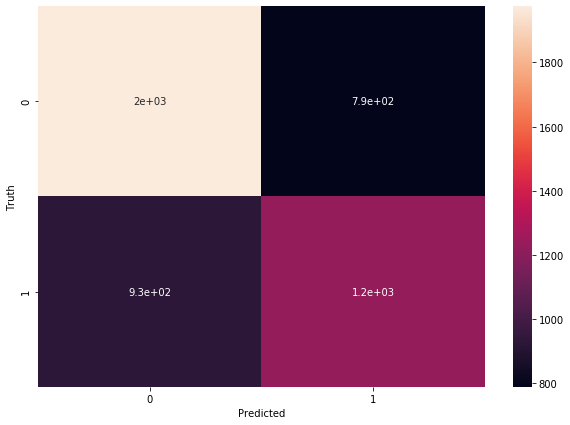

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### Sorting features by importance weight

In [25]:
# Listing feature importance weighting
feature_imp = pd.Series(rf.feature_importances_, index=feature_names).sort_values(ascending=False)
feature_imp

td_prob                   0.164064
ep                        0.141578
half_seconds_remaining    0.138833
fg_prob                   0.138533
ydstogo                   0.127071
score_differential        0.107931
yardline_100              0.093181
pass_length_short         0.014770
shotgun                   0.014157
pass_length_deep          0.011359
no_huddle                 0.009486
play_type_pass            0.008891
play_type_run             0.007926
run_location_left         0.007526
run_location_right        0.007461
run_location_middle       0.007232
down                      0.000000
dtype: float64

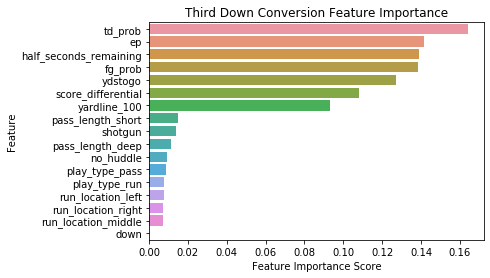

In [26]:

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Third Down Conversion Feature Importance")

plt.show()

## What Features are important in predicting whether a third down run or pass play(no constraints)?

In [99]:
df2 = pd.read_csv("./random_forest_data/Balanced_Data.csv")
df2 = df2.drop(columns=['pass_length.1', 'Unnamed: 0.1', "Unnamed: 0"])

print('total records', len(df2))
df2['play_type'].value_counts()


total records 19704


run     9852
pass    9852
Name: play_type, dtype: int64

#### Data preprocessing 

In [28]:
#Encode Play Type so that the column contains numerical codes.
from sklearn.preprocessing import LabelEncoder
le_play_type = LabelEncoder()





In [29]:
df2['play_type_n'] = le_play_type.fit_transform(df2['play_type'])


                                                
list(df2.columns)

['play_id',
 'game_id',
 'shotgun',
 'no_huddle',
 'ydstogo',
 'yardline_100',
 'play_type',
 'half_seconds_remaining',
 'down',
 'pass_length',
 'run_location',
 'score_differential',
 'fg_prob',
 'td_prob',
 'ep',
 'third_down_converted',
 'play_type_n']

In [41]:
# Set features and label to predict.
features = df2.drop(['play_type_n', 'play_id', 'game_id', 'pass_length', 'run_location', 'play_type'], axis=1)
feature_names2 = features.columns
features = np.array(features)
feature_names2



Index(['shotgun', 'no_huddle', 'ydstogo', 'yardline_100',
       'half_seconds_remaining', 'down', 'score_differential', 'fg_prob',
       'td_prob', 'ep', 'third_down_converted'],
      dtype='object')

In [42]:
label = df2['play_type_n']


#### Test/Train split

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size =0.30, random_state=42)

#### Random Forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf2 = RandomForestClassifier(n_estimators=300)
rf2.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [45]:
rf2.score(X_test, y_test)

0.7374830852503383

#### Confusion Matrix

In [46]:
y_predicted = rf2.predict(X_test)

In [47]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_predicted)


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_predicted))
print()
print("Classification Report")
print(classification_report(y_test, y_predicted))

Confusion Matrix:
[[2366  609]
 [ 943 1994]]

Classification Report
              precision    recall  f1-score   support

           0       0.72      0.80      0.75      2975
           1       0.77      0.68      0.72      2937

   micro avg       0.74      0.74      0.74      5912
   macro avg       0.74      0.74      0.74      5912
weighted avg       0.74      0.74      0.74      5912



Text(69.0, 0.5, 'Truth')

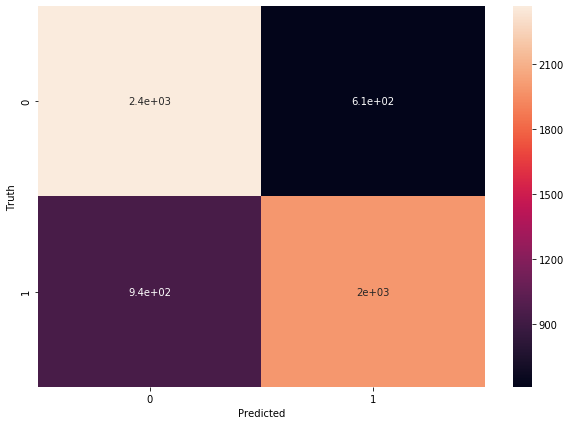

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### Sorting features by importance weight

In [49]:
feature_imp2 = pd.Series(rf2.feature_importances_, index=feature_names2).sort_values(ascending=False)
feature_imp2

td_prob                   0.151187
ydstogo                   0.150054
shotgun                   0.131456
half_seconds_remaining    0.130214
ep                        0.121393
fg_prob                   0.118666
score_differential        0.095755
yardline_100              0.077794
third_down_converted      0.016157
no_huddle                 0.007325
down                      0.000000
dtype: float64

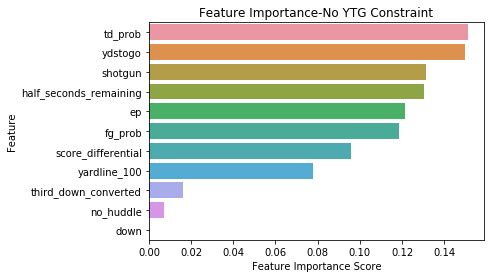

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plot = sns.barplot(x=feature_imp2, y=feature_imp2.index)

plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance-No YTG Constraint")
plt.savefig('passRun-feature-imp.png')
plt.show()

# What features are important in predicting run or pass play on 3rd and <=5

In [124]:
df5 = pd.read_csv("./random_forest_data/balanced_3and5_data.csv")

df5 = df5.drop(columns=['pass_length.1', 'Unnamed: 0.1', "Unnamed: 0"])

df5 = df5[df5.ydstogo<=5]

print('total records', len(df5))
df5['play_type'].value_counts()


total records 13450


run     6725
pass    6725
Name: play_type, dtype: int64

#### Data preprocessing 

In [125]:
#Encode Play Type so that the column contains numerical codes.
from sklearn.preprocessing import LabelEncoder
le_play_type = LabelEncoder()

In [126]:

df5['play_type_n'] = le_play_type.fit_transform(df5['play_type'])


                                                
list(df5.columns)

['play_id',
 'game_id',
 'shotgun',
 'no_huddle',
 'ydstogo',
 'yardline_100',
 'play_type',
 'half_seconds_remaining',
 'down',
 'pass_length',
 'run_location',
 'score_differential',
 'fg_prob',
 'td_prob',
 'ep',
 'third_down_converted',
 'play_type_n']

In [127]:
# Set features and label to predit
features5 = df5.drop(['play_type_n', 'play_id', 'game_id', 'pass_length', 'run_location', 'play_type'], axis=1)
feature_names5 = features5.columns

feature_names5

Index(['shotgun', 'no_huddle', 'ydstogo', 'yardline_100',
       'half_seconds_remaining', 'down', 'score_differential', 'fg_prob',
       'td_prob', 'ep', 'third_down_converted'],
      dtype='object')

In [128]:
label5 = df5['play_type_n']

#### Test/Train split

In [129]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features5, label5, test_size =0.30, random_state=42)

In [133]:
from sklearn.ensemble import RandomForestClassifier
rf5 = RandomForestClassifier(n_estimators=300)
rf5.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [134]:
rf5.score(X_test, y_test)

0.7605947955390334

#### confusion matrix

In [135]:
y_predicted = rf5.predict(X_test)

In [136]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_predicted)


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_predicted))
print()
print("Classification Report")
print(classification_report(y_test, y_predicted))

Confusion Matrix:
[[1587  438]
 [ 528 1482]]

Classification Report
              precision    recall  f1-score   support

           0       0.75      0.78      0.77      2025
           1       0.77      0.74      0.75      2010

   micro avg       0.76      0.76      0.76      4035
   macro avg       0.76      0.76      0.76      4035
weighted avg       0.76      0.76      0.76      4035



Text(69.0, 0.5, 'Truth')

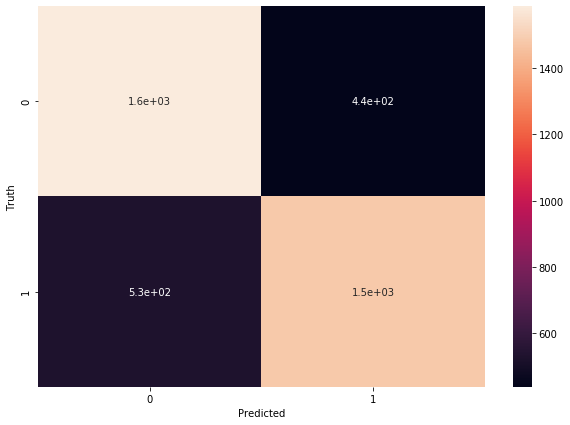

In [137]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### Sorting feature by importance weight

In [138]:
feature_imp5 = pd.Series(rf5.feature_importances_, index=feature_names5).sort_values(ascending=False)
feature_imp5

ydstogo                   0.157328
td_prob                   0.151454
half_seconds_remaining    0.127126
ep                        0.123274
shotgun                   0.118940
fg_prob                   0.117862
score_differential        0.101254
yardline_100              0.075264
third_down_converted      0.018965
no_huddle                 0.008533
down                      0.000000
dtype: float64

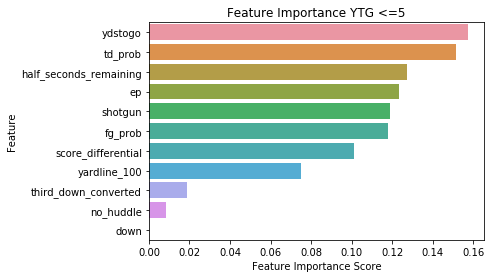

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plot = sns.barplot(x=feature_imp5, y=feature_imp5.index)

plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance YTG <=5")
# plt.savefig('passRun-feature-imp.png')
plt.show()

## What features are important in predicting run or pass play on third and short (<= 3 yards)?

In [140]:
df3 = pd.read_csv("./random_forest_data/balanced_3and3_data.csv")

df3 = df3.drop(columns=['pass_length.1', 'Unnamed: 0.1', "Unnamed: 0"])

df3 = df3[df3.ydstogo<=3]

print('total records', len(df3))
df3['play_type'].value_counts()


total records 11474


run     5737
pass    5737
Name: play_type, dtype: int64

#### Data preprocessing 

In [141]:
#Encode Play Type so that the column contains numerical codes.
from sklearn.preprocessing import LabelEncoder
le_play_type = LabelEncoder()

In [142]:

df3['play_type_n'] = le_play_type.fit_transform(df3['play_type'])


                                                
list(df2.columns)

['play_id',
 'game_id',
 'shotgun',
 'no_huddle',
 'ydstogo',
 'yardline_100',
 'play_type',
 'half_seconds_remaining',
 'down',
 'pass_length',
 'run_location',
 'score_differential',
 'fg_prob',
 'td_prob',
 'ep',
 'third_down_converted']

In [143]:
# Set features and label to predit
features3 = df3.drop(['play_type_n', 'play_id', 'game_id', 'pass_length', 'run_location', 'play_type'], axis=1)
feature_names3 = features3.columns

feature_names3

Index(['shotgun', 'no_huddle', 'ydstogo', 'yardline_100',
       'half_seconds_remaining', 'down', 'score_differential', 'fg_prob',
       'td_prob', 'ep', 'third_down_converted'],
      dtype='object')

In [144]:
label3 = df3['play_type_n']

#### Test/Train split

In [145]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features3, label3, test_size =0.30, random_state=42)

In [146]:
from sklearn.ensemble import RandomForestClassifier
rf3 = RandomForestClassifier(n_estimators=300)
rf3.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [147]:
rf3.score(X_test, y_test)

0.7295962823119373

#### confusion matrix

In [148]:
y_predicted = rf3.predict(X_test)

In [149]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_predicted)


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_predicted))
print()
print("Classification Report")
print(classification_report(y_test, y_predicted))

Confusion Matrix:
[[1289  449]
 [ 482 1223]]

Classification Report
              precision    recall  f1-score   support

           0       0.73      0.74      0.73      1738
           1       0.73      0.72      0.72      1705

   micro avg       0.73      0.73      0.73      3443
   macro avg       0.73      0.73      0.73      3443
weighted avg       0.73      0.73      0.73      3443



Text(69.0, 0.5, 'Truth')

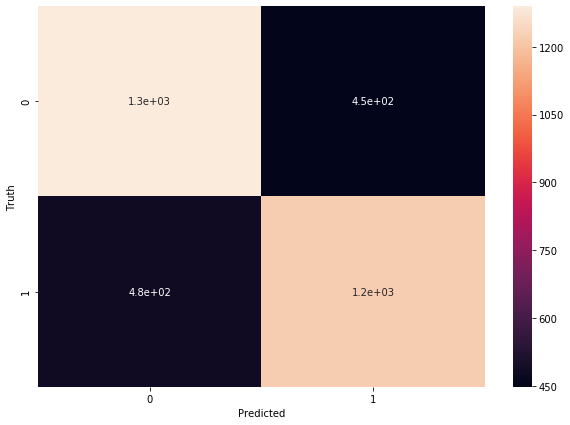

In [150]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### Sorting feature by importance weight

In [151]:
feature_imp3 = pd.Series(rf3.feature_importances_, index=feature_names3).sort_values(ascending=False)
feature_imp3

td_prob                   0.144581
ydstogo                   0.135938
shotgun                   0.131683
half_seconds_remaining    0.131126
ep                        0.125291
fg_prob                   0.124062
score_differential        0.102210
yardline_100              0.076779
third_down_converted      0.019657
no_huddle                 0.008673
down                      0.000000
dtype: float64

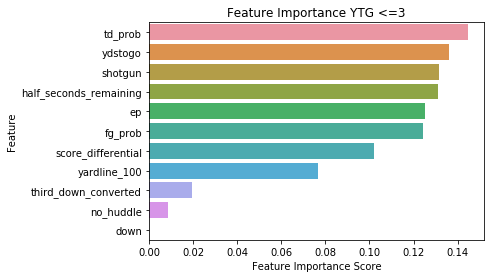

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plot = sns.barplot(x=feature_imp3, y=feature_imp3.index)

plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance YTG <=3")
# plt.savefig('passRun-feature-imp.png')
plt.show()

# What features are important in predicting run or pass play on 3rd and <=1

In [155]:
df4 = pd.read_csv("./random_forest_data/balanced_3and1_data.csv")

df4 = df4.drop(columns=['pass_length.1', 'Unnamed: 0.1', "Unnamed: 0"])

df4 = df4[df4.ydstogo<=1]

print('total records', len(df4))
df4['play_type'].value_counts()


total records 2946


pass    1473
run     1473
Name: play_type, dtype: int64

#### Data preprocessing 

In [156]:
#Encode Play Type so that the column contains numerical codes.
from sklearn.preprocessing import LabelEncoder
le_play_type = LabelEncoder()

In [157]:

df4['play_type_n'] = le_play_type.fit_transform(df4['play_type'])


                                                
list(df4.columns)

['play_id',
 'game_id',
 'shotgun',
 'no_huddle',
 'ydstogo',
 'yardline_100',
 'play_type',
 'half_seconds_remaining',
 'down',
 'pass_length',
 'run_location',
 'score_differential',
 'fg_prob',
 'td_prob',
 'ep',
 'third_down_converted',
 'play_type_n']

In [158]:
# Set features and label to predit
features4 = df4.drop(['play_type_n', 'play_id', 'game_id', 'pass_length', 'run_location', 'play_type'], axis=1)
feature_names4 = features4.columns

feature_names4

Index(['shotgun', 'no_huddle', 'ydstogo', 'yardline_100',
       'half_seconds_remaining', 'down', 'score_differential', 'fg_prob',
       'td_prob', 'ep', 'third_down_converted'],
      dtype='object')

In [159]:
label4 = df4['play_type_n']

#### Test/Train split

In [160]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features4, label4, test_size =0.30, random_state=42)

In [161]:
from sklearn.ensemble import RandomForestClassifier
rf4 = RandomForestClassifier(n_estimators=300)
rf4.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [162]:
rf4.score(X_test, y_test)

0.6289592760180995

#### confusion matrix

In [163]:
y_predicted = rf4.predict(X_test)

In [164]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_predicted)


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_predicted))
print()
print("Classification Report")
print(classification_report(y_test, y_predicted))

Confusion Matrix:
[[260 178]
 [150 296]]

Classification Report
              precision    recall  f1-score   support

           0       0.63      0.59      0.61       438
           1       0.62      0.66      0.64       446

   micro avg       0.63      0.63      0.63       884
   macro avg       0.63      0.63      0.63       884
weighted avg       0.63      0.63      0.63       884



Text(69.0, 0.5, 'Truth')

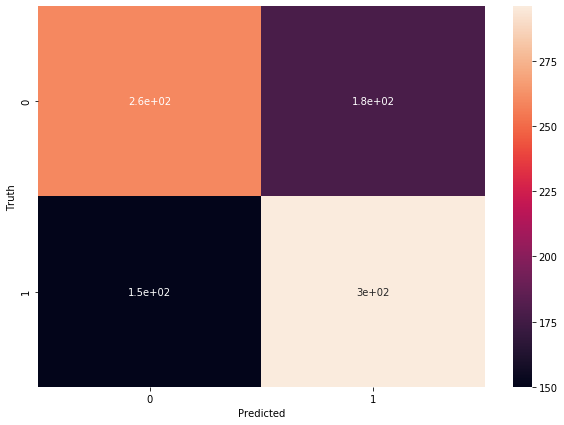

In [165]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### Sorting feature by importance weight

In [166]:
feature_imp4 = pd.Series(rf4.feature_importances_, index=feature_names4).sort_values(ascending=False)
feature_imp4

half_seconds_remaining    0.173103
td_prob                   0.157783
fg_prob                   0.148966
ep                        0.148276
score_differential        0.128361
shotgun                   0.115273
yardline_100              0.093874
third_down_converted      0.023969
no_huddle                 0.010394
down                      0.000000
ydstogo                   0.000000
dtype: float64

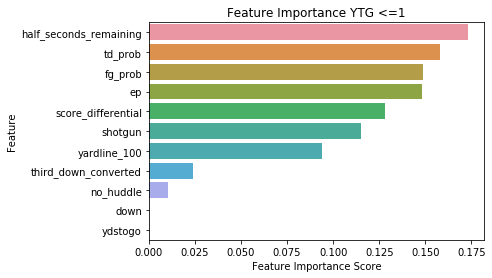

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plot = sns.barplot(x=feature_imp4, y=feature_imp4.index)

plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance YTG <=1")
# plt.savefig('passRun-feature-imp.png')
plt.show()